# ML Project2

# Import Libraries 

In [52]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [53]:
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [54]:
df = pd.read_csv('telco-customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# only three columns are numerical others are catagorical

In [56]:
df.shape

(7043, 21)

In [57]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [58]:
features = df.columns
features

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Check Null Values

In [59]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# No null values

No null/Nan values, therefore no data imputation required

In [60]:
# List of all features with number of unique values present in them

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [61]:
# Drop CustomerId column as it is not required
df.drop(['customerID'], axis = 1, inplace = True)

In [62]:
# Here totalcharges are object types so we need to change it into numeric format
df['TotalCharges'].dtype

dtype('O')

In [63]:
# Changing in numeric format
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [64]:
#Null value check
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We could remove TotalCharges empty rows since is a small percentage of the dataset. However, these rows are legit as they correspond to new customers (tenure == 0). Even though there are values in MonthlyCharges column, there is no total values. As described in the data dictionary, the total charges are summed up quarterly, so new customers will not have entries. We could fill the gaps with zero or some reasonable value. Since the wide range, we will fill with the median value:

In [65]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [66]:
df.shape

(7043, 20)

In [67]:
#Null value check
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Correlation in Features

In [68]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


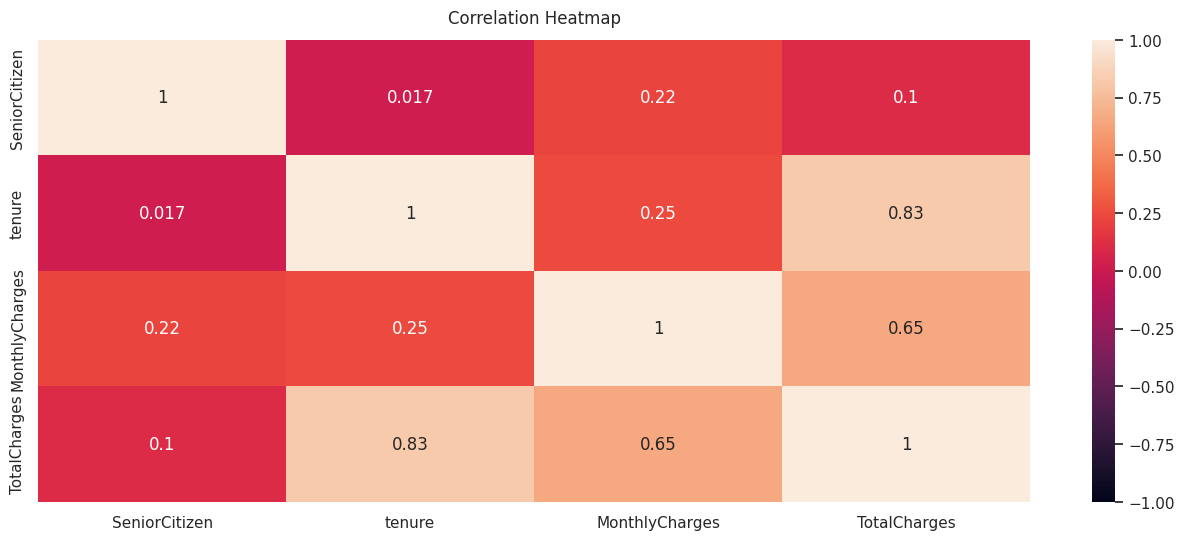

In [69]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

As evident from the correlation matrix, since 'totalcharges' is the total monthly charges over the tenure of a customer, 'totalcharges' is highly correlated with 'monthlycharges' and 'tenure'.

### We will categorize some of the columns / features based on wether they are categorical values or continuous (i.e numerical) values. 

In [70]:
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record

string_fields = [type(fld) is str for fld in df.iloc[first_record_idx, columns_idx]] # All string fields
all_features = [x for x in df.columns if x != 'Churn']
categorical_columns = list(np.array(df.columns)[columns_idx][string_fields])
categorical_features = [x for x in categorical_columns if x != 'Churn']
continuous_features = [x for x in all_features if x not in categorical_features]

print('All Features: ', all_features)
print('\nCategorical Features: ', categorical_features)
print('\nContinuous Features: ', continuous_features)
print('\nAll Categorical Columns: ', categorical_columns)

All Features:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

Categorical Features:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Continuous Features:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

All Categorical Columns:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


# Data Visualization 

### First, we get a high level view of the distribution of Churn. What percentage of customer in our dataset are churning vs not churning.

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

%matplotlib inline
sns.set(style="darkgrid")
sns.set_palette("hls", 3)

Churn
No     5174
Yes    1869
dtype: int64


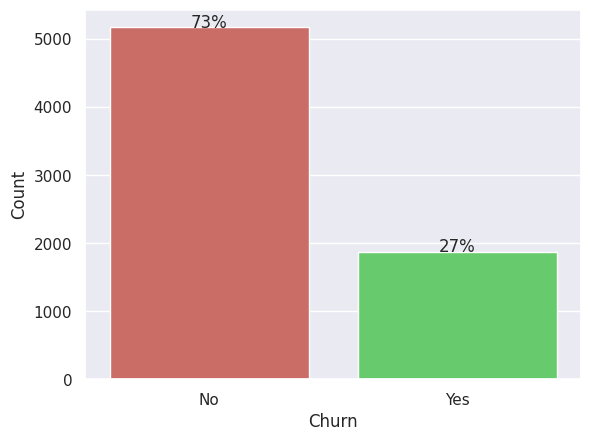

In [72]:
print(df.groupby(['Churn']).size())
churn_plot = sns.countplot(data=df, x='Churn', order=df.Churn.value_counts().index)
plt.ylabel('Count')
for p in churn_plot.patches:
    height = p.get_height()
    churn_plot.text(p.get_x()+p.get_width()/2., height + 1,'{0:.0%}'.format(height/float(len(df))),ha="center") 
plt.show()

### the graph shows us a common issue concerning customer churn across various industries; Class Imbalance. The Telco Customer Churn dataset had an over-representation of the ‘Not- Churned’ class (73%) and under-representation of ‘Churned’ class(27%).

In [73]:
# Groupby function 
churn_count1 = df.groupby('Churn')
churn_count1.mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2552.882494
Yes,0.254682,17.979133,74.441332,1531.796094


### We can get use frequency counts charts to get an understanding of the categorical features relative to Churn

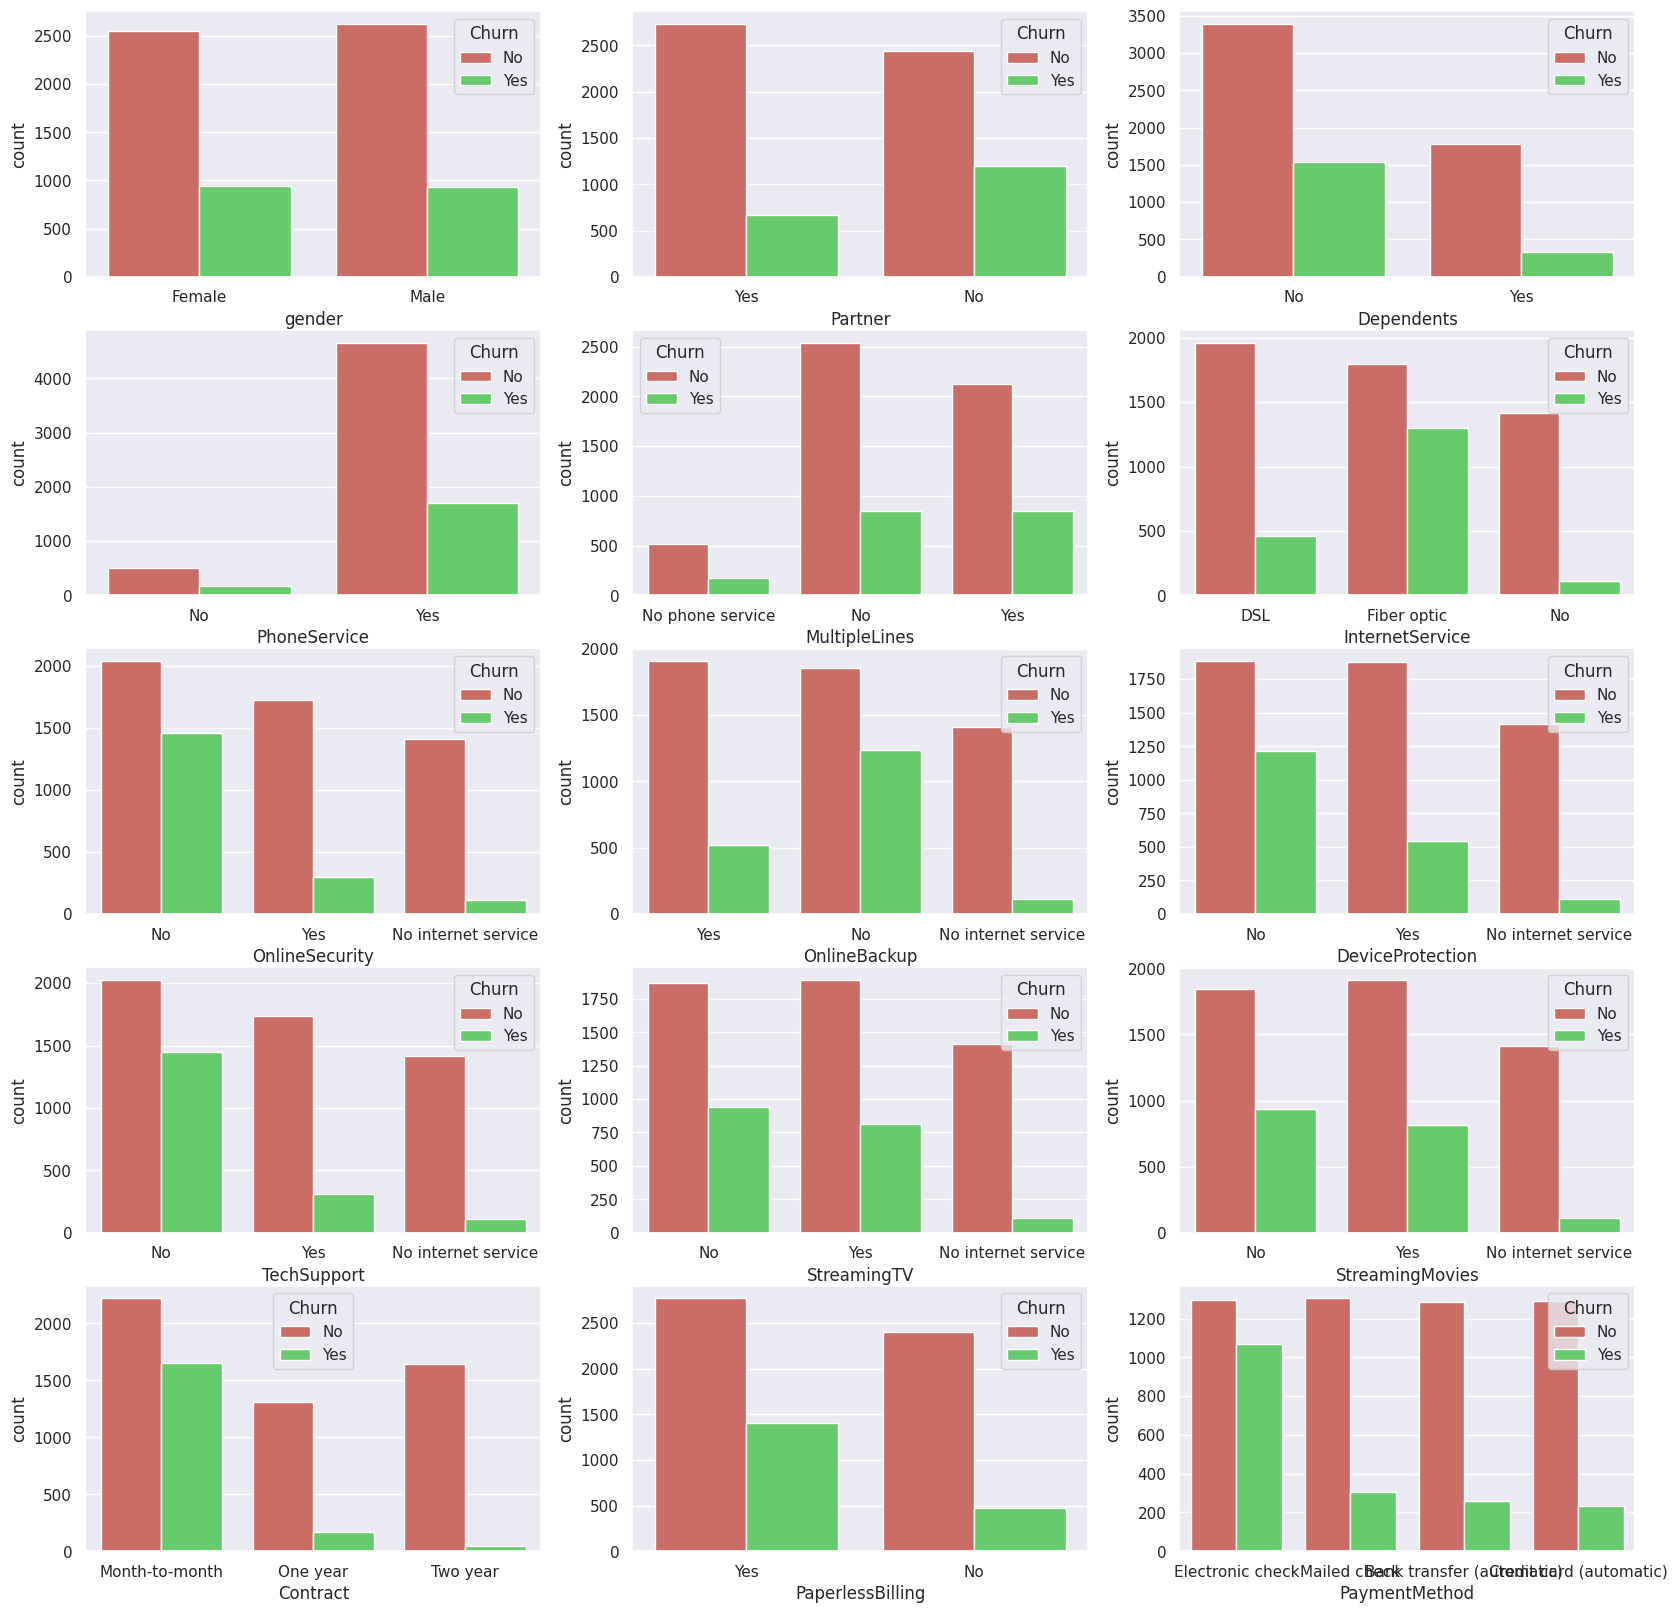

In [74]:
# Categorical feature count plots
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(20, 20))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15 ]

for i in range(len(categorical_features)):
    sns.countplot(x = categorical_features[i], hue="Churn", data=df, ax=ax[i])

- We can see that for the gender feature. We have relatively equal rates of churn by gender
- We can see that for the InternetService feature. We have higher churn for those that have "Fiber optic" service versus those with "DSL"
- We can see that for the Contact feature. We have higher churn for those that have "Month-to-month" service versus other

### We can get use histrogram charts to get an understanding of the distribution of our continuous / numerical features relative to Churn.

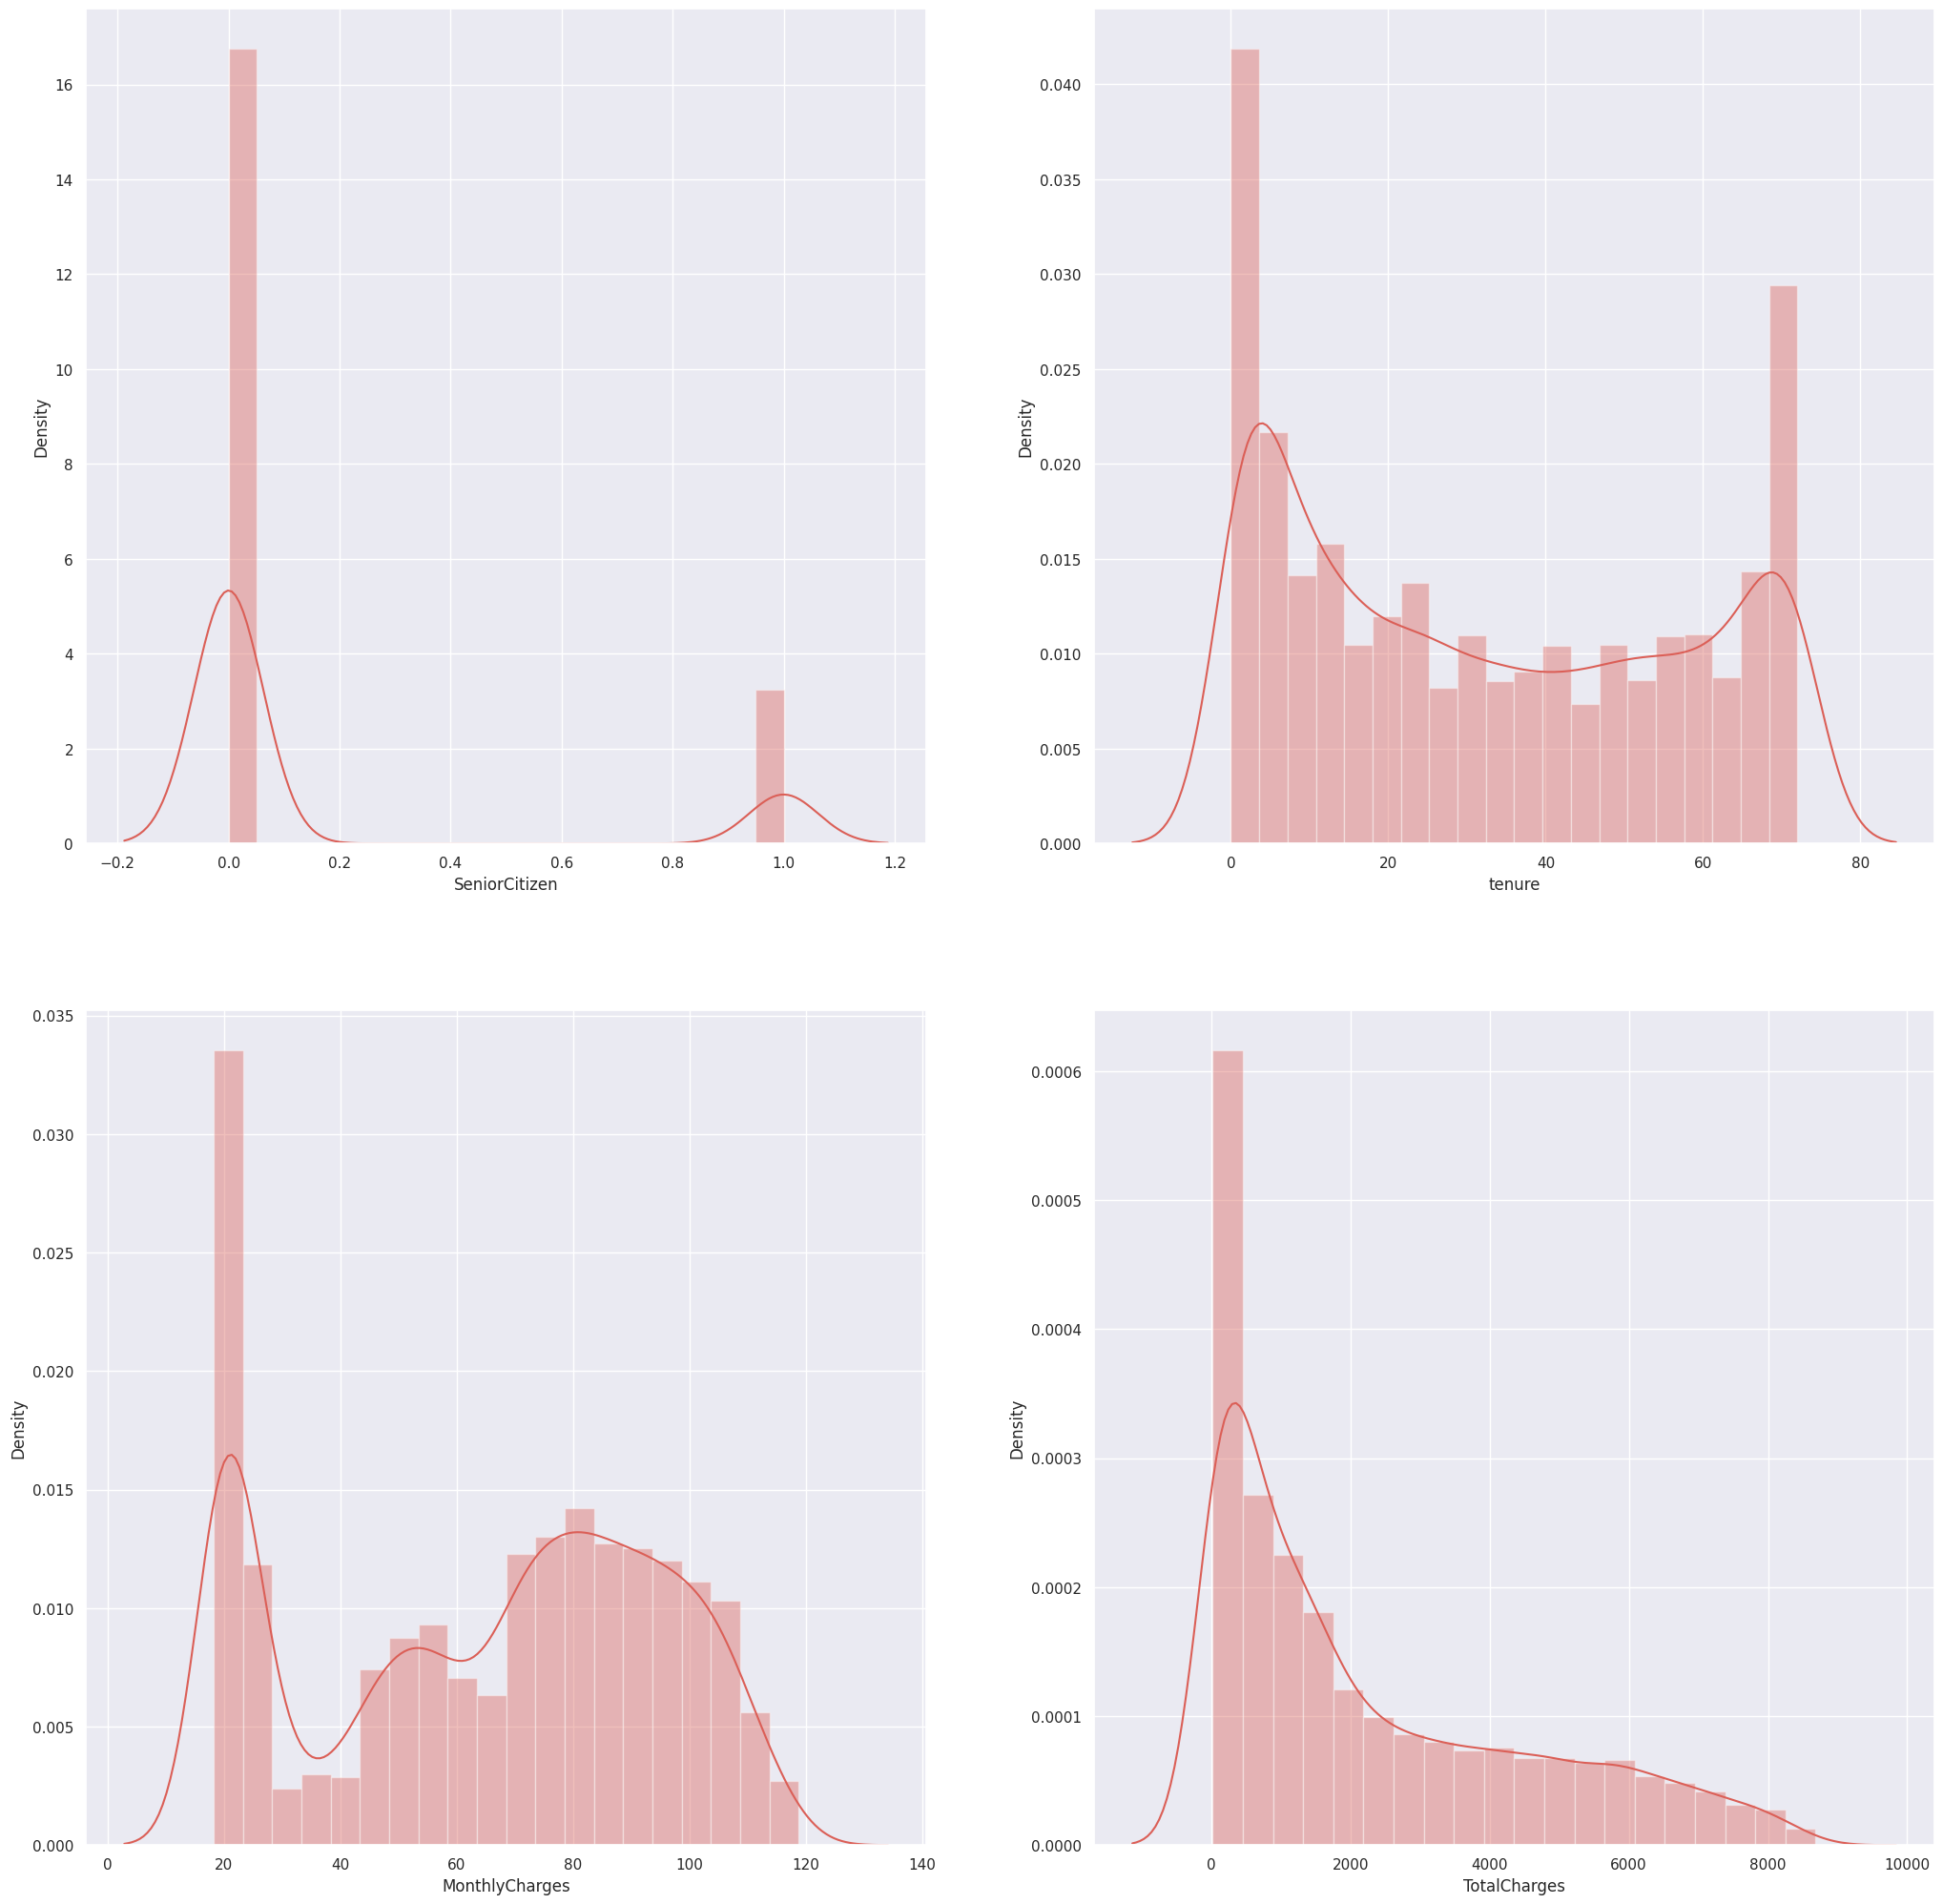

In [75]:
sns.set_palette("hls", 3)
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 25))
ax = [ax1, ax2, ax3, ax4]
for i in range(len(continuous_features)):
    sns.distplot(df[continuous_features[i]], bins=20, hist=True, ax=ax[i])

- We can see that for the MonthlyCharges feature, customers that churn tend to pay higher monthly fees than those that stay.
- We can see that for the tenure feature, customers that churn tend to be relatively new customers.

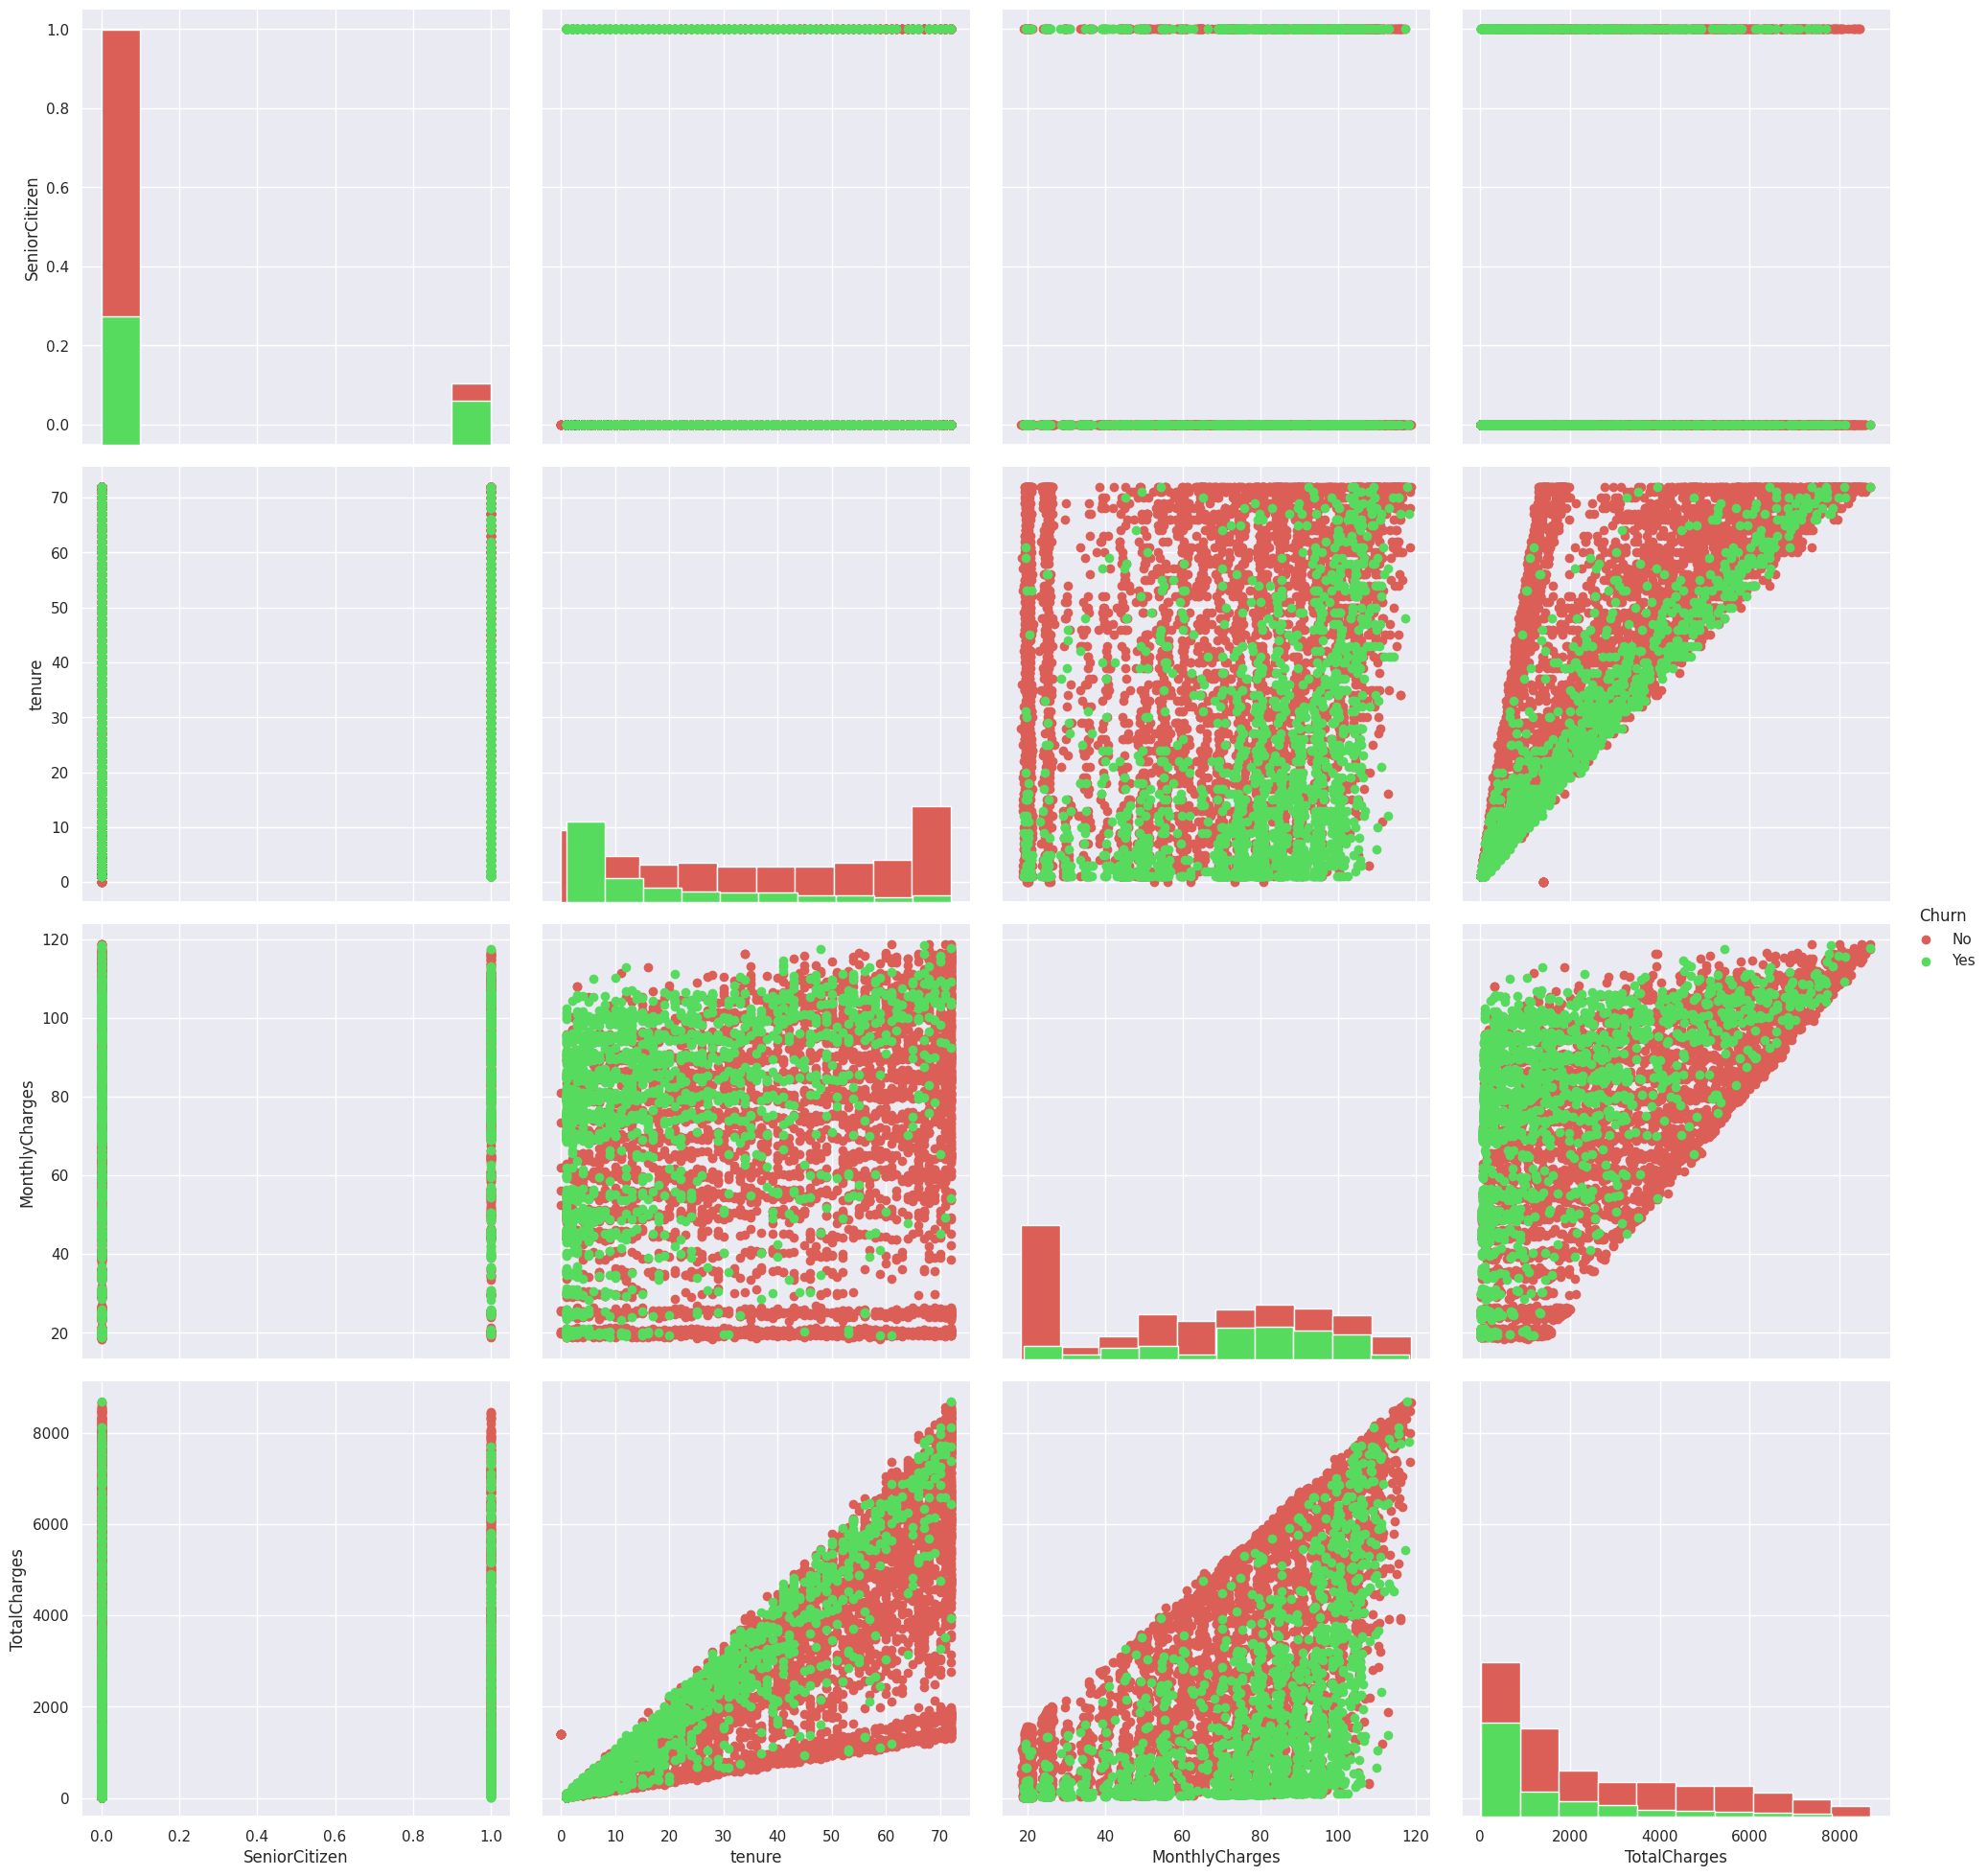

In [76]:
# Create Grid for pairwise relationships
gr = sns.PairGrid(df, height=5, hue="Churn")
gr = gr.map_diag(plt.hist)
gr = gr.map_offdiag(plt.scatter)
gr = gr.add_legend()

- Most customers with Month-to-month contract and Fibre optic Internet Service churned.
- Customers with Two-year contract and No Internet service have least churn rate.
- Customers who did churn showed a declining trend with increase in tenure period.
- Customers who did not churn increased when tenure is very less (0-5 months) and more than 66
- months (showing a peak towards the ends with dropped curve in the middle).
- When Monthly Charges are less, less customer churn rate is observed seeing maximum churn rate at nearly 75units Monthly charge.
- Churn rate is higher for customers with Multiple Lines while those with No Phone Service have least churn rate.

# Preprocessing Data

In [77]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [78]:
#Replace long negative text by "No" for ease of access
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [79]:
# Replaceing Male be 0 and Female by 1
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [80]:
# 3 Features column in dataset have more than 2 categorical values
more_than_2 = ['InternetService' ,'Contract' ,'PaymentMethod']
df = pd.get_dummies(data=df, columns= more_than_2)

In [81]:
two_cate = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for i in two_cate:
    df[i].replace({"No":0, "Yes":1}, inplace=True)

In [82]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

### now all columns are numerical 

In [84]:
# feature correlation 
corr_matrix = df.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
StreamingTV                                0.063228
StreamingMovies                            0.061382
MultipleLines                              0.040102
PhoneService                               0.011942
gender                                     0.008612
DeviceProtection                          -0.066160
OnlineBackup                              -0.082255
PaymentMethod_Mailed check                -0.091683
PaymentMethod_Bank transfer (automatic)   -0.117937
InternetService_DSL                       -0.124214
PaymentMethod_Credit card (automatic)     -0.134302
Partner                                   -0.150448
Dependents  

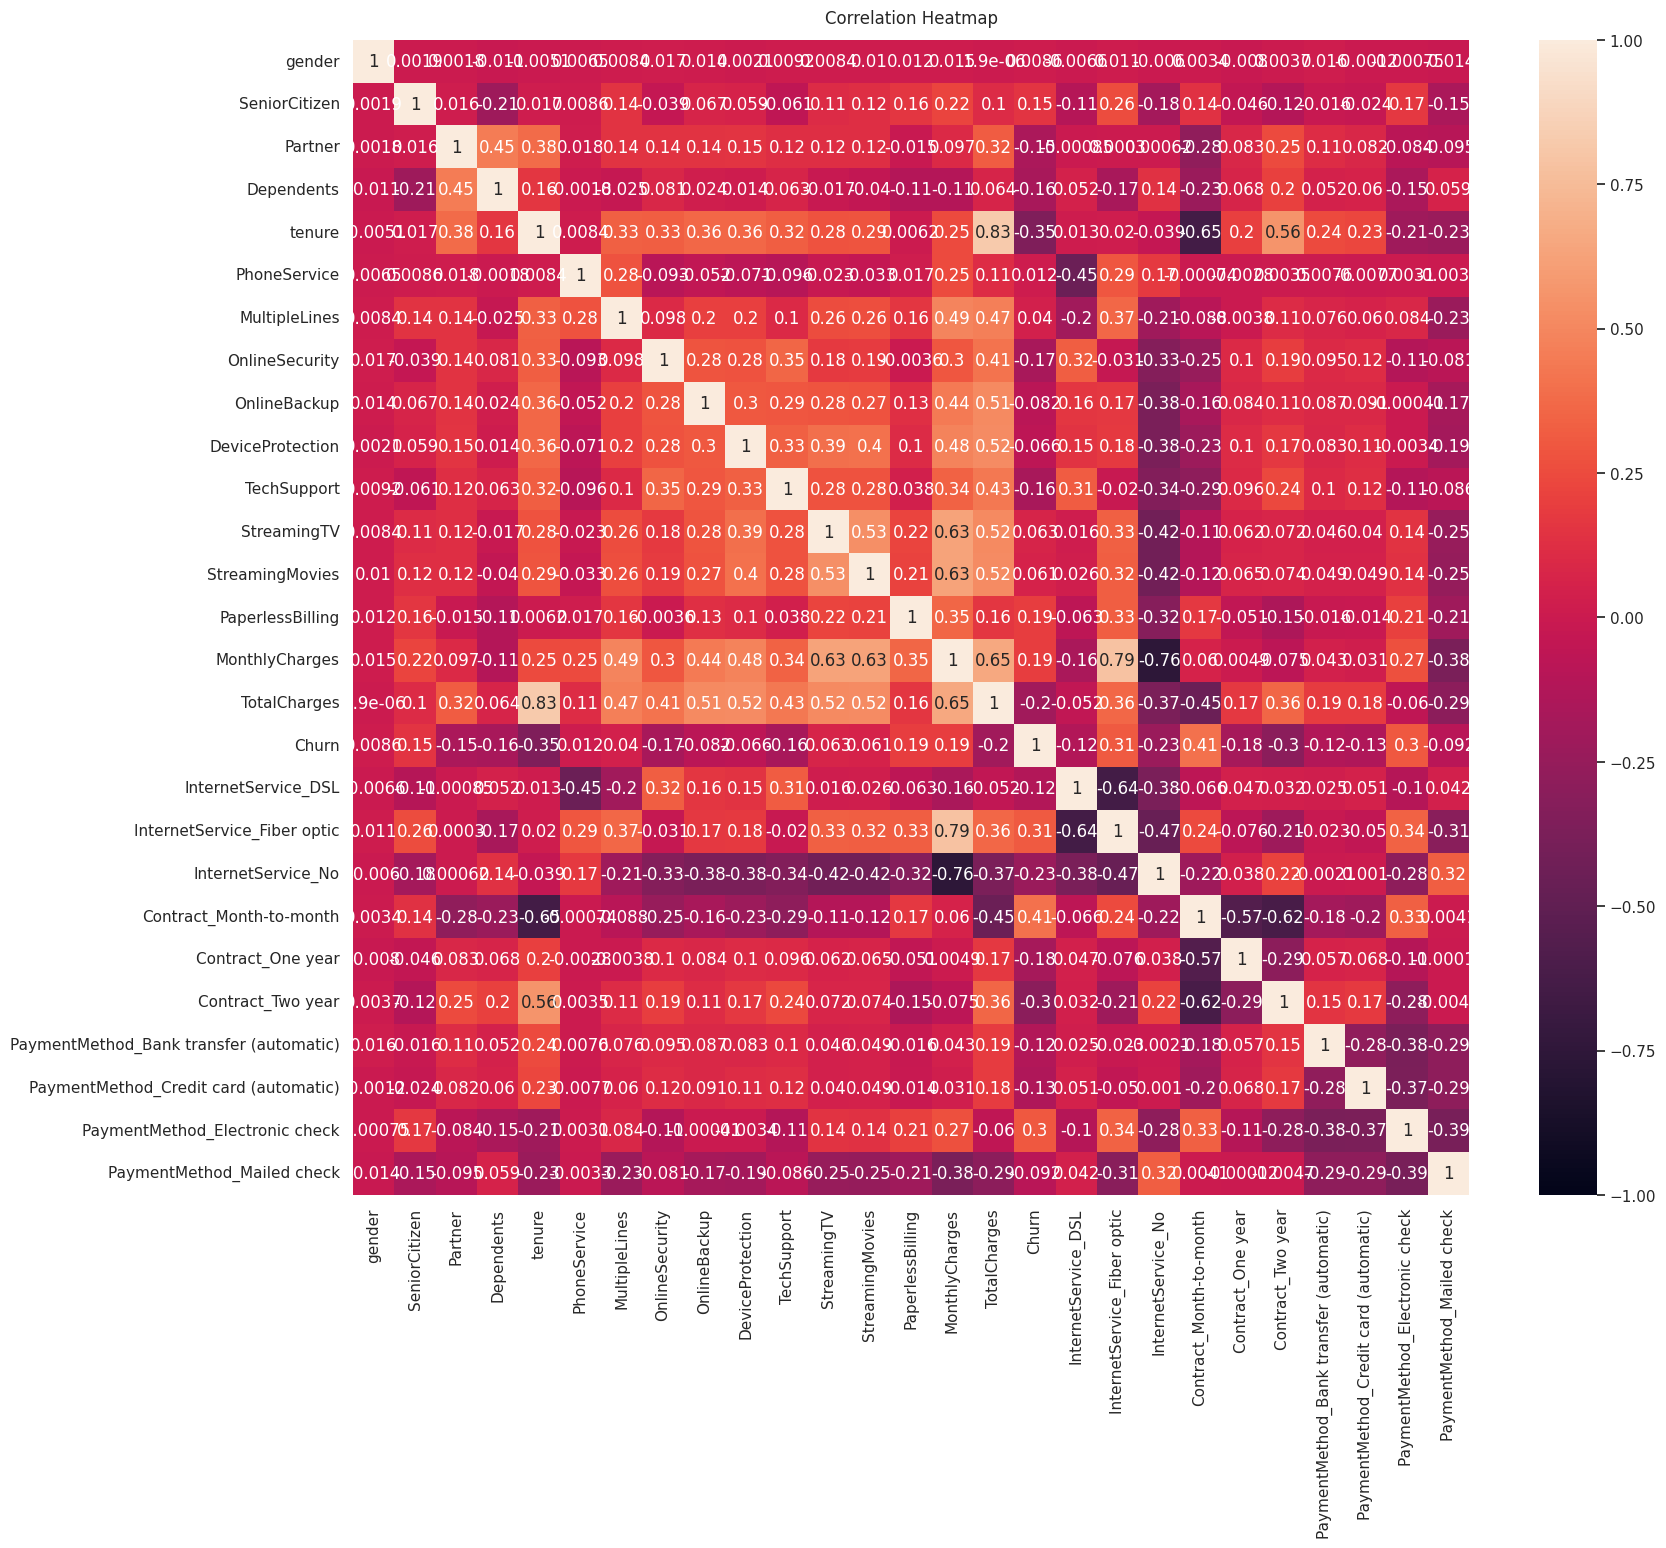

In [85]:
plt.figure(figsize=(18, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The correlation plot confirms the trends we have seen before:

strong negative correlation with churn:
- tenure
- two years contract
- no internet service

strong positive correlation with churn:
- month to month contract
- no online services (security, tech support, backup, device protection)
- fiber optic internet
- electronic check payment
- monthly charges


There is some correlation between 'phone service' and 'multiple lines' since those who don't have a phone service cannot have multiple lines. So, knowing that a particular customer is not subscribed to phone service we can infer that the customer doesn't have multiple lines. Similarly, there is also a correlation between 'internet service' and 'online security', 'online backup', 'device protection', 'streaming tv' and 'streaming movies'

In [86]:
# Renaming Columns for consistency 
df = df.rename(columns={
    "gender": "Gender",
    "tenure": "Tenure"
})
df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   Tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

In [88]:
# Separate Feature and Target
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [89]:
# Spliting Data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) 

In [41]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (5634, 26)
X_test (1409, 26)
y_train (5634,)
y_test (1409,)


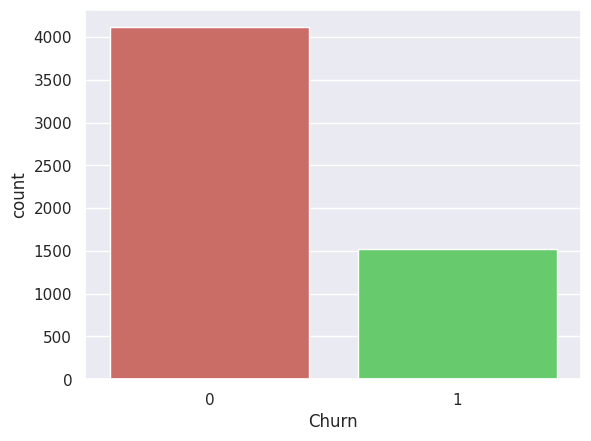

In [90]:
sns.countplot(x=y_train);

Data is highly imbalanced

In [91]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaling_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

X_train[scaling_cols] = sc.fit_transform(X_train[scaling_cols])
X_train

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1814,0,0,1,1,-0.825884,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5946,1,0,0,0,0.395961,1,0,1,1,1,...,1,0,0,0,1,0,0,1,0,0
3881,0,0,1,0,1.577078,1,1,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2389,0,0,1,1,1.577078,1,1,1,0,1,...,1,0,0,0,1,0,0,0,1,0
3676,0,0,0,0,-0.092777,1,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0,1,0,0,-0.948068,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5192,0,0,0,1,1.129068,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3980,0,0,0,0,-0.174233,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
235,0,0,0,0,-1.233166,1,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [92]:
X_test[scaling_cols] = sc.transform(X_test[scaling_cols])
X_test

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3381,1,0,0,0,0.355233,1,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
6180,1,1,0,0,1.373437,1,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4829,1,0,0,0,-0.825884,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3737,1,0,0,0,-1.110981,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4249,1,0,1,1,-0.907340,1,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,0,1,0,0,-0.296418,1,1,0,1,1,...,0,1,0,1,0,0,0,0,0,1
2028,1,0,0,0,-0.703699,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2899,0,0,0,0,1.577078,0,0,1,1,1,...,1,0,0,0,0,1,1,0,0,0
3474,0,1,1,1,1.332709,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0


# Analysis on Original Dataset

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

In [94]:
# Model Building Functions

def logistic_regression(X_train, y_train, X_test):  
  classifier = LogisticRegression(random_state=0)
  classifier.fit(X_train, y_train)
  return classifier.predict(X_test)
  
def naive_bayes(X_train, y_train, X_test):
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)
  return classifier.predict(X_test)

def random_forest(x_train, y_train, x_test, n = 100, criterion = 'gini', random_state = 0, max_depth = None):
  classifier = RandomForestClassifier(n_estimators=n, criterion=criterion, random_state=random_state, max_depth=max_depth)
  classifier.fit(x_train, y_train)  
  return classifier.predict(x_test)

def xg_boost(x_train, y_train, x_test, n = 100, random_state= 0, max_depth = 10, learning_rate= 0.1):
  classifier = XGBClassifier(n_estimators = n, max_depth = max_depth, random_state = random_state, learning_rate = learning_rate)
  classifier.fit(x_train, y_train)
  return classifier.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score, average_precision_score, recall_score, f1_score,classification_report

In [96]:
# Model Evaluation Functions

def get_metrics(y_true, y_pred):
  return {
      "Accuracy": accuracy_score(y_true, y_pred),
      "Precision": average_precision_score(y_true, y_pred),
      "Recall": recall_score(y_true, y_pred),
      "F1 Score": f1_score(y_true, y_pred)
  }

def get_recall(y_true, y_pred):
  return recall_score(y_true, y_pred)

### Logistic Regression

In [97]:
# Logistic Regression
y_pred_lr = logistic_regression(X_train, y_train, X_test)
print(get_metrics(y_test, y_pred_lr))

{'Accuracy': 0.8119233498935415, 'Precision': 0.47079162440297273, 'Recall': 0.5890804597701149, 'F1 Score': 0.6074074074074074}


In [98]:
recall_lg1 = get_recall(y_test, y_pred_lr)
print('Recall: %.3f' % recall_lg1)

Recall: 0.589


### Naive Bayes

In [99]:
# Naive Bayes
y_pred_nb = naive_bayes(X_train, y_train, X_test)
print(get_metrics(y_test, y_pred_nb))

{'Accuracy': 0.7508871540099361, 'Precision': 0.4542324902078613, 'Recall': 0.8275862068965517, 'F1 Score': 0.6213592233009709}


In [100]:
recall_gnb1 = get_recall(y_test, y_pred_nb)
print('Recall: %.3f' % recall_gnb1)

Recall: 0.828


### Random Forest

In [101]:
# Random Forest
y_pred_rf = random_forest(X_train, y_train, X_test)
print(get_metrics(y_test, y_pred_rf))

{'Accuracy': 0.8026969481902059, 'Precision': 0.4448102791899967, 'Recall': 0.5373563218390804, 'F1 Score': 0.5736196319018405}


In [102]:
recall_rf1 = get_recall(y_test, y_pred_rf)
print('Recall: %.3f' % recall_rf1)

Recall: 0.537


In [115]:
# Random Forest - Hyper Parameter Tuning
y_pred_rfh = random_forest(X_train, y_train, X_test, 25, 'entropy', random_state = 5, max_depth = 9)
print(get_metrics(y_test, y_pred_rfh))

{'Accuracy': 0.8112136266855926, 'Precision': 0.4709423890220828, 'Recall': 0.5948275862068966, 'F1 Score': 0.6088235294117648}


In [104]:
recall_rf1h = get_recall(y_test, y_pred_rfh)
print('Recall: %.3f' % recall_rf1h)

Recall: 0.595


### XGBoost

In [105]:
# XGBoost
y_pred_xgb = xg_boost(X_train, y_train, X_test)
print(get_metrics(y_test, y_pred_xgb))

{'Accuracy': 0.8041163946061036, 'Precision': 0.45745078331626315, 'Recall': 0.5833333333333334, 'F1 Score': 0.5953079178885631}


In [106]:
recall_xgb1 = get_recall(y_test, y_pred_xgb)
print('Recall: %.3f' % recall_xgb1)

Recall: 0.583


In [141]:
# XGBoost - Hyper Paramter Tuning
y_pred_xgbh = xg_boost(X_train, y_train, X_test, 80, 5, 11, 0.1)
print(get_metrics(y_test, y_pred_xgbh))

{'Accuracy': 0.808374733853797, 'Precision': 0.46587808695279226, 'Recall': 0.5919540229885057, 'F1 Score': 0.6041055718475073}


In [142]:
recall_xgb1h = get_recall(y_test, y_pred_xgbh)
print('Recall: %.3f' % recall_xgb1h)

Recall: 0.592


,Model,Recall_score
0,Naïve Bayes,0.827586
3,Random Forest - hypertune,0.594828
5,XGBoost - hypertune,0.591954
1,Logistic Regression,0.589080
4,XGBoost,0.583333
2,Random Forest,0.537356


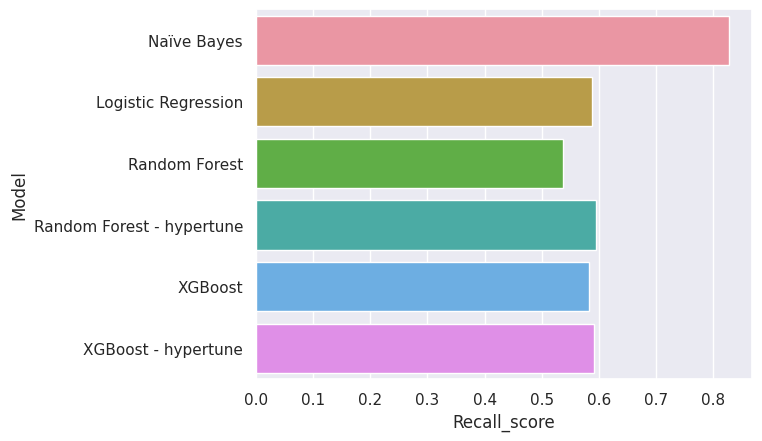

In [144]:
analysis_original_compare = pd.DataFrame({
    'Model':['Naïve Bayes','Logistic Regression', 'Random Forest', 'Random Forest - hypertune', 'XGBoost',  'XGBoost - hypertune'],
    'Recall_score' :[recall_gnb1, recall_lg1, recall_rf1, recall_rf1h, recall_xgb1, recall_xgb1h]
})
analysis_original_compare
sns.barplot(x='Recall_score', y='Model', data=analysis_original_compare)

analysis_original_compare.sort_values(by='Recall_score', ascending=False)

As seen in the table above, based on the recall score, Naive Bayes performs better than any other algorithms on the unbalance dataset.

# SMOTE Technique

In [145]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [146]:
X1, y1 = oversample.fit_resample(X,y)
X1.shape, y1.shape

((10348, 26), (10348,))

In [147]:
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.2, random_state=42)

In [148]:
pd.Series(y1_train).value_counts()

0    4153
1    4125
Name: Churn, dtype: int64

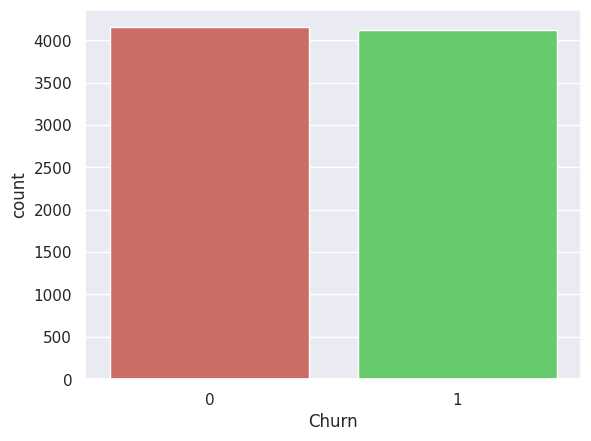

In [149]:
sns.countplot(x=y1_train);

In [ ]:
# now the yes and no churn seems balanced after SMOTE

## Naïve Bayes

In [150]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB , MultinomialNB, ComplementNB

# creating object for model
model_gnb = GaussianNB()
model_gnb.fit(X1_train, y1_train)
# Making Predictions
pred_gnb = model_gnb.predict(X1_test)
# Classification Report
print(classification_report(y1_test, pred_gnb))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1021
           1       0.79      0.83      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



In [151]:
recall_gnb = recall_score(y1_test,pred_gnb)
print('Recall: %.3f' % recall_gnb)

Recall: 0.831


In [152]:
# creating object for model
model_gnb2 = MultinomialNB()
model_gnb2.fit(X1_train, y1_train)
# Making Predictions
pred_gnb2 = model_gnb.predict(X1_test)
# Classification Report
print(classification_report(y1_test, pred_gnb2))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1021
           1       0.79      0.83      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



In [153]:
recall_gnb2 = recall_score(y1_test,pred_gnb)
print('Recall: %.3f' % recall_gnb2)

Recall: 0.831


## Logistic Regression

In [154]:
# creating object for model
model_lg = LogisticRegression()
model_lg.fit(X1_train, y1_train)
# Making Predictions
pred_lg = model_lg.predict(X1_test)
# Classification Report
print(classification_report(y1_test, pred_lg))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1021
           1       0.81      0.87      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



In [155]:
recall_lg = recall_score(y1_test,pred_lg)
print('Recall: %.3f' % recall_lg)

Recall: 0.867


In [156]:
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV

In [157]:
param_lr = {'C': [0.01, 0.1, 1, 10],
                       'class_weight': [None, 'balanced'],
                       'penalty': ['l2'],
                       'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                  'saga']}

In [158]:
random_search_lr = GridSearchCV(LogisticRegression(),
                                   param_lr)
random_search_lr.fit(X1_train, y1_train)
print(random_search_lr.best_estimator_)


LogisticRegression(C=10, solver='newton-cg')


In [159]:
# hyper parameter tuning
# creating object for model
model_lg2 = LogisticRegression(max_iter=10000,random_state=42, n_jobs=1,C=10)
model_lg2.fit(X1_train, y1_train)
# Making Predictions
pred_lg2 = model_lg2.predict(X1_test)
# Classification Report
print(classification_report(y1_test, pred_lg2))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1021
           1       0.86      0.85      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [160]:
recall_lg2 = recall_score(y1_test,pred_lg2)
print('Recall: %.3f' % recall_lg2)

Recall: 0.851


## Random Forests

In [161]:
model_rf = RandomForestClassifier()
# Training Model
model_rf.fit(X1_train, y1_train)
# Making Prediction
pred_rf = model_rf.predict(X1_test)
# Classification Report
print(classification_report(y1_test,pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1021
           1       0.86      0.84      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [162]:
recall_rf = recall_score(y1_test,pred_rf)
print('Recall: %.3f' % recall_rf)

Recall: 0.843


In [163]:
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
                      'min_samples_leaf': [5, 10, 20, 50, 100],
                       'criterion': ['gini', 'entropy', 'log_loss'],
                       #'n_estimators': [100, 250, 500, 1000]
}

In [164]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X1_train, y1_train)
print(random_search.best_estimator_)


RandomForestClassifier(criterion='log_loss', max_depth=20, min_samples_leaf=5)


In [165]:
# hyper parameter tuning
#model_rf2 = RandomForestClassifier(criterion = "gini",random_state = 10,max_depth=10, min_samples_leaf=5)
model_rf2 = RandomForestClassifier(criterion='log_loss', max_depth=5, min_samples_leaf=5,random_state = 12)
# Training Model
model_rf2.fit(X1_train, y1_train)
# Making Prediction
pred_rf2 = model_rf2.predict(X1_test)
# Classification Report
print(classification_report(y1_test,pred_rf2))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1021
           1       0.79      0.89      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070



In [166]:
recall_rf2 = recall_score(y1_test,pred_rf2)
print('Recall: %.3f' % recall_rf2)

Recall: 0.887


## XGBoost

In [167]:
from xgboost import XGBClassifier
# Creating model object
model_xgb = XGBClassifier()
# Training Model
model_xgb.fit(X1_train, y1_train)
# Making Prediction
pred_xgb = model_xgb.predict(X1_test)
print(classification_report(y1_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1021
           1       0.86      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [168]:
recall_xgb = recall_score(y1_test,pred_xgb)
print('Recall: %.3f' % recall_xgb)

Recall: 0.855


In [169]:
params_xgb = {'learning_rate': [0.01,0.03, 0.1, 0.3],
                       'max_depth': range(1, 6, 1),
                       'n_estimators': [10, 50, 100, 500],
                      'subsample': [0.5, 0.75, 1.0],
                        'colsample_bytree': [0.5, 0.75, 1.0]}

In [170]:
random_search_xgb = RandomizedSearchCV(XGBClassifier(),
                                   params_xgb)
random_search_xgb.fit(X1_train, y1_train)
print(random_search_xgb.best_estimator_)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [171]:
# hyper parameter tuning
# Creating model object
model_xgb2 = XGBClassifier(max_depth= 3, n_estimators= 500, random_state= 0,  learning_rate= 0.03, n_jobs=5)
# Training Model
model_xgb2.fit(X1_train, y1_train)
# Making Prediction
pred_xgb2 = model_xgb2.predict(X1_test)
print(classification_report(y1_test,pred_xgb2))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1021
           1       0.84      0.87      0.86      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [172]:
recall_xgb2 = recall_score(y1_test,pred_xgb2)
print('Recall: %.3f' % recall_xgb2)

Recall: 0.872


# Model Comparison

,Model,Recall_score
11,Random Forest SMOTE - hypertune,0.886559
12,XGBoost SMOTE - hypertune,0.872259
7,Logistic Regression SMOTE,0.867493
9,XGBoost SMOTE,0.855100
10,Logistic Regression SMOTE - hypertune,0.851287
8,Random Forest SMOTE,0.842707
6,Naïve Bayes SMOTE,0.831268
0,Naïve Bayes,0.827586
4,Random Forest - hypertune,0.594828
5,XGBoost - hypertune,0.591954


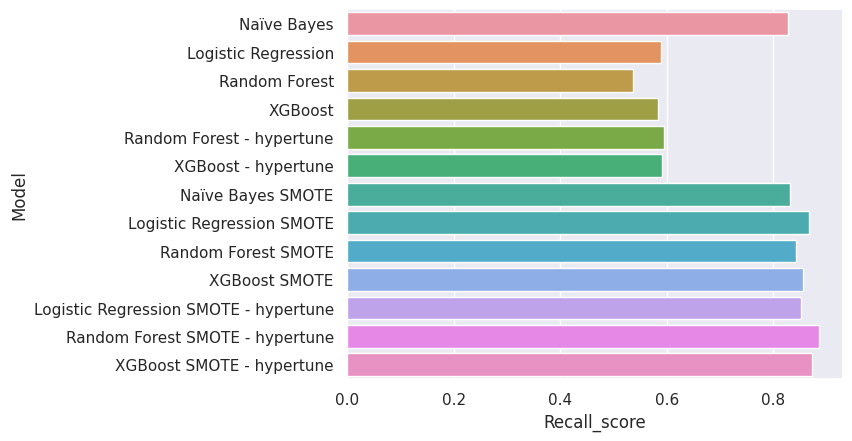

In [173]:
models = pd.DataFrame({
    'Model':['Naïve Bayes','Logistic Regression', 'Random Forest', 'XGBoost', 'Random Forest - hypertune', 'XGBoost - hypertune', 'Naïve Bayes SMOTE','Logistic Regression SMOTE', 'Random Forest SMOTE', 'XGBoost SMOTE', 'Logistic Regression SMOTE - hypertune','Random Forest SMOTE - hypertune', 'XGBoost SMOTE - hypertune'],
    'Recall_score' :[recall_gnb1, recall_lg1, recall_rf1, recall_xgb1, recall_rf1h, recall_xgb1h, recall_gnb, recall_lg, recall_rf, recall_xgb, recall_lg2, recall_rf2, recall_xgb2]
})
models
sns.barplot(x='Recall_score', y='Model', data=models)

models.sort_values(by='Recall_score', ascending=False)

# Conclusion 

We can see that among the classifiers that do not overfit, Random Forests classifier has the highest recall. In terms of Revenue Retained, Random Forests are the best.